In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

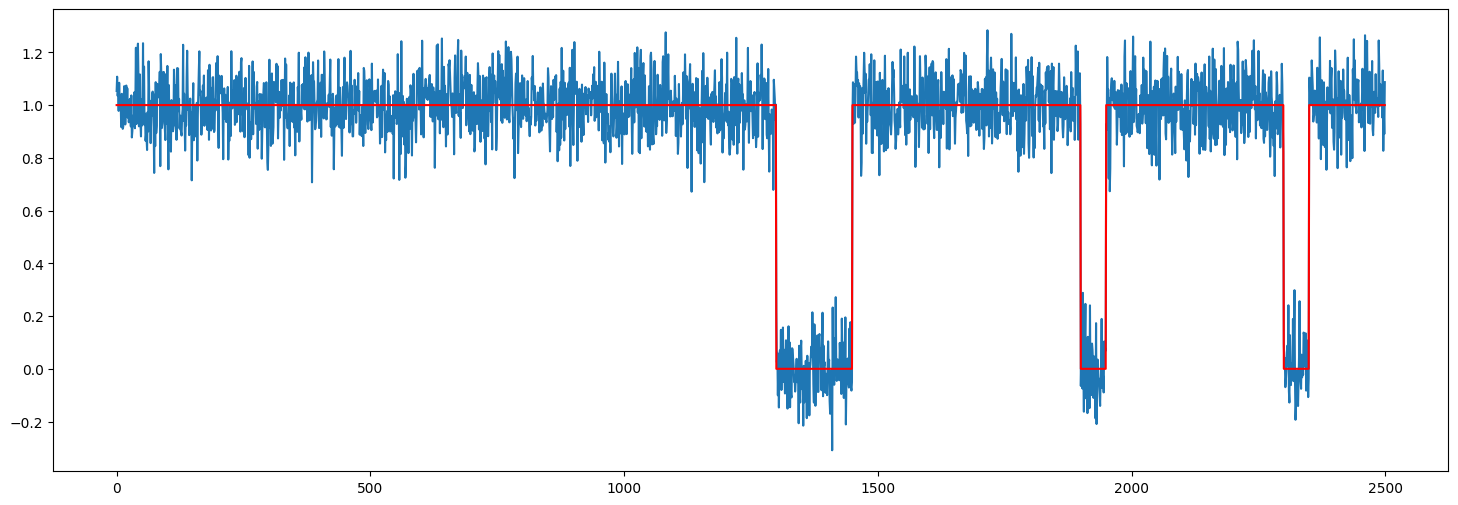

In [2]:
# Generación de datos simbólicos
a1 = 1
a0 = 0
Nsamples = 50
p_0 = 0.2
p_1 = 1 - p_0
Nsymbols = 50
N = Nsymbols * Nsamples

# Generar datos
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data = np.concatenate([[v]*Nsamples for v in data])
message = data

σ2 = 0.1
noise = np.random.normal(0, σ2, N)
messageNoise = message + noise

plt.figure(figsize=(18, 6))
plt.plot(messageNoise)
plt.plot(message,'r')
plt.show()

Epoch 1/20
79/79 [==============================] - 5s 9ms/step - loss: 0.1057
Epoch 2/20
79/79 [==============================] - 1s 10ms/step - loss: 0.0161
Epoch 3/20
79/79 [==============================] - 1s 11ms/step - loss: 0.0016
Epoch 4/20
79/79 [==============================] - 1s 11ms/step - loss: 4.7985e-04
Epoch 5/20
79/79 [==============================] - 1s 9ms/step - loss: 2.8875e-04
Epoch 6/20
79/79 [==============================] - 1s 11ms/step - loss: 1.1732e-04
Epoch 7/20
79/79 [==============================] - 1s 11ms/step - loss: 8.0005e-05
Epoch 8/20
79/79 [==============================] - 1s 10ms/step - loss: 7.8946e-05
Epoch 9/20
79/79 [==============================] - 1s 9ms/step - loss: 5.3710e-05
Epoch 10/20
79/79 [==============================] - 1s 9ms/step - loss: 3.4536e-05
Epoch 11/20
79/79 [==============================] - 1s 9ms/step - loss: 3.5366e-05
Epoch 12/20
79/79 [==============================] - 1s 10ms/step - loss: 2.4993e-05
Epoch 

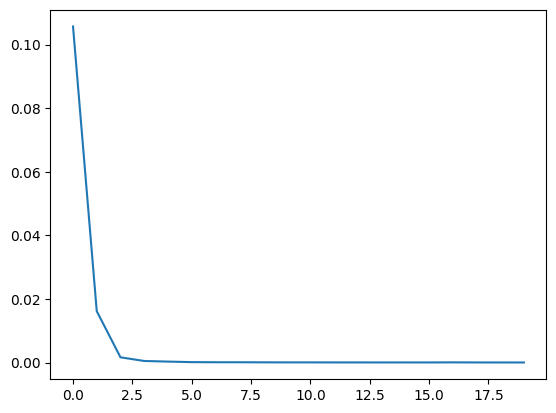

In [3]:
# Definir un modelo más complejo y con regularización
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu', input_shape=[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


# Compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mean_squared_error')

# Entrenar el modelo
historial = modelo.fit(messageNoise, message, epochs=20, verbose=True)
plt.plot(historial.history["loss"])


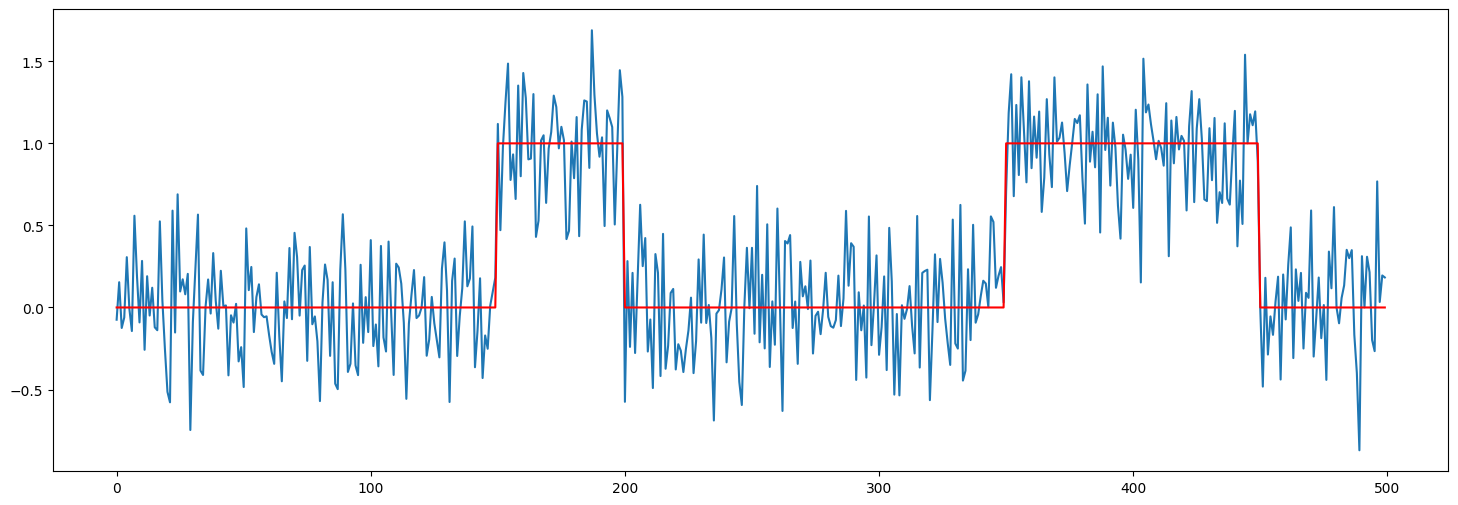

In [6]:
# Generación de datos simbólicos
a1 = 1      # Valor del símbolo a1
a0 = 0      # Valor del símbolo a0
Nsamples = 50  # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.8
p_1 = 1 - p_0
Nsymbols = 10 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

# Genera una secuencia de símbolos basados en las probabilidades dadas
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message1 = data  # Almacena la secuencia completa en la variable 'message'

σ2 = 0.3  # Varianza del ruido
noise1 = np.random.normal(0, σ2, N)
messageNoise1 = message1 + noise1

plt.figure(figsize=(18, 6))
plt.plot(messageNoise1)
plt.plot(message1,'r')
plt.show()

16/16 [==============================] - 0s 6ms/step


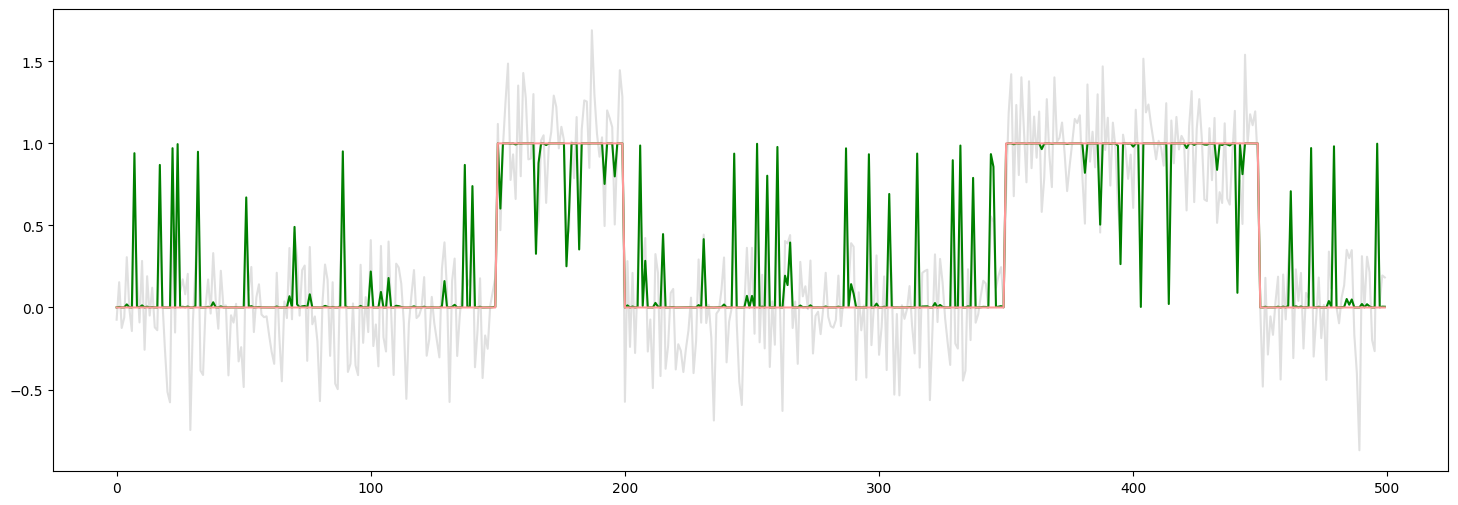

In [7]:
resultado = modelo.predict(messageNoise1)

plt.figure(figsize=(18, 6))
plt.plot(messageNoise1,color='#E0E0E0')
plt.plot(resultado,'g')
plt.plot(message1, color='#FF9999')
#plt.xlim(0,2000)

plt.show()